# Step 1: Data Retrieval

 There are several sources available, but a commonly used one is the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. We can access this data via their GitHub repository.

In [12]:
import pandas as pd

# Retrieve COVID-19 data from JHU GitHub repository
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/' \
      'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_' \
      'confirmed_global.csv'
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


# Step 2: Data Cleaning and Transformation

We'll need to perform some cleaning and transformation to prepare it for analysis. This involves removing unnecessary columns, aggregating data if needed, and handling missing values.

In [13]:
# Remove unnecessary columns
df.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)

# Aggregate data by country
df = df.groupby('Country/Region').sum()

# Transpose the data for better visualization
df = df.transpose()

# Convert the date column to datetime format
df.index = pd.to_datetime(df.index)

# Handle missing values if any
df.fillna(0, inplace=True)

df

C:\Users\jonat\AppData\Local\Temp\ipykernel_19212\454549733.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,209390,334427,271477,47875,105277,11,9106,10044125,446819,11385534,...,1034303,251071,12014,552051,11526966,703228,535,11945,343135,264127
2023-03-06,209406,334427,271477,47875,105277,11,9106,10044957,446819,11385534,...,1034303,251071,12014,552125,11526966,703228,535,11945,343135,264127
2023-03-07,209436,334427,271490,47875,105277,11,9106,10044957,446819,11385534,...,1034303,251071,12014,552157,11526986,703228,535,11945,343135,264127
2023-03-08,209451,334443,271494,47890,105288,11,9106,10044957,447308,11385534,...,1034303,251247,12014,552157,11526994,703228,535,11945,343135,264276


In [18]:
# To get a list of the countries included in the dataset
print(list(df.columns))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'In

# Step 3: Data Analysis and Visualization

With the cleaned and transformed data, we can now perform analysis and create visualizations to gain insights into the COVID-19 pandemic. <br>
We calculate the daily new cases for the selected country by taking the difference (diff()) of the cumulative cases over time. The result is stored in a new DataFrame df_country. Then, the code proceeds to plot the daily new cases for the chosen country.

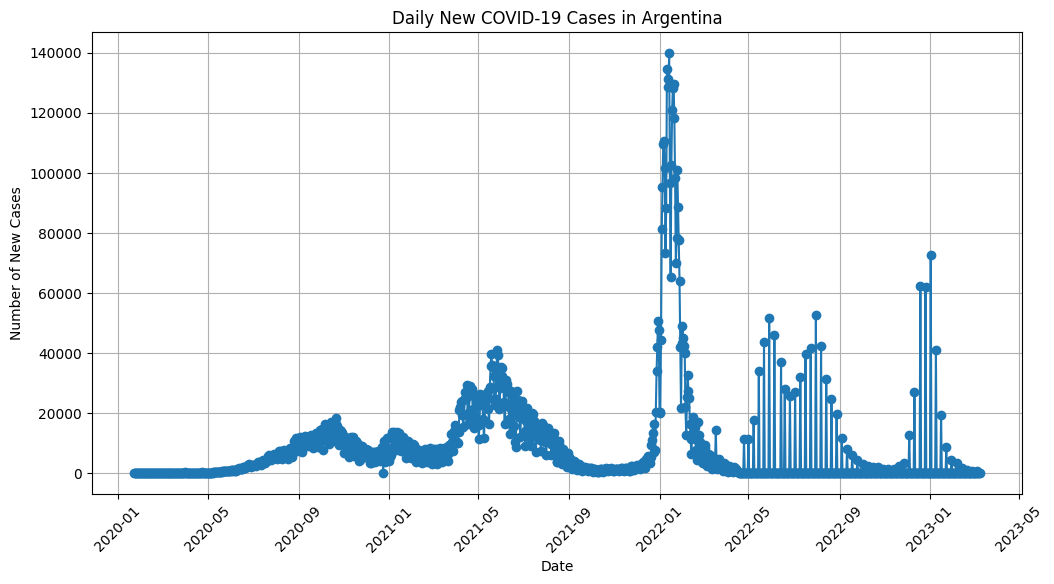

In [17]:
import matplotlib.pyplot as plt

# Choose a specific country for analysis
country = 'Argentina'

# Calculate daily new cases for the selected country
df_country = pd.DataFrame({'Date': df.index, 'New Cases': df[country].diff()}).set_index('Date')

# Plot the daily new cases for the selected country
plt.figure(figsize=(12, 6))
plt.plot(df_country.index, df_country['New Cases'], marker='o')
plt.title(f'Daily New COVID-19 Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Step 4: Interpretation and Conclusion

By analyzing the graph, we can draw some insights:

- Trends and Patterns: The graph shows the fluctuation in the daily new COVID-19 cases in Argentina over time. Initially, there were relatively low numbers, but around mid-2020, there was a sharp increase in cases.

- Outbreaks and Peaks: The graph exhibits several peaks and troughs, indicating different waves or outbreaks of the virus. Peaks represent periods of high infection rates, while troughs signify relatively lower rates.

- Government Measures: Significant spikes and dips in the graph can be associated with government interventions such as lockdowns, social distancing measures, and changes in testing capacity. These measures impact the number of reported cases.

- Monitoring the Situation: Monitoring the daily new cases helps in understanding the spread of the virus, assessing the effectiveness of preventive measures, and identifying critical periods for healthcare system preparedness.

- Data Limitations: It's important to note that the reported daily new cases depend on testing capacity, data collection, and reporting protocols. Discrepancies and variations in reporting across different regions can affect the accuracy and consistency of the data.

# Now, using some best practices and taking the code a bit further

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Data Retrieval
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/' \
      'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_' \
      'confirmed_global.csv'

# Read the COVID-19 data from the provided URL
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [29]:
# Step 2: Data Cleaning and Transformation
def preprocess_data(df):
    """
    Preprocesses the COVID-19 data by removing unnecessary columns,
    aggregating data by country, and handling missing values.
    """
    # Remove unnecessary columns
    df.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)

    # Aggregate data by country
    df = df.groupby('Country/Region').sum()

    # Transpose the data for better visualization
    df = df.transpose()

    # Convert the date column to datetime format
    df.index = pd.to_datetime(df.index)

    # Handle missing values if any
    df.fillna(0, inplace=True)

    return df

# Preprocess the data
df = preprocess_data(df)
df

C:\Users\jonat\AppData\Local\Temp\ipykernel_19212\3849377822.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,209390,334427,271477,47875,105277,11,9106,10044125,446819,11385534,...,1034303,251071,12014,552051,11526966,703228,535,11945,343135,264127
2023-03-06,209406,334427,271477,47875,105277,11,9106,10044957,446819,11385534,...,1034303,251071,12014,552125,11526966,703228,535,11945,343135,264127
2023-03-07,209436,334427,271490,47875,105277,11,9106,10044957,446819,11385534,...,1034303,251071,12014,552157,11526986,703228,535,11945,343135,264127
2023-03-08,209451,334443,271494,47890,105288,11,9106,10044957,447308,11385534,...,1034303,251247,12014,552157,11526994,703228,535,11945,343135,264276


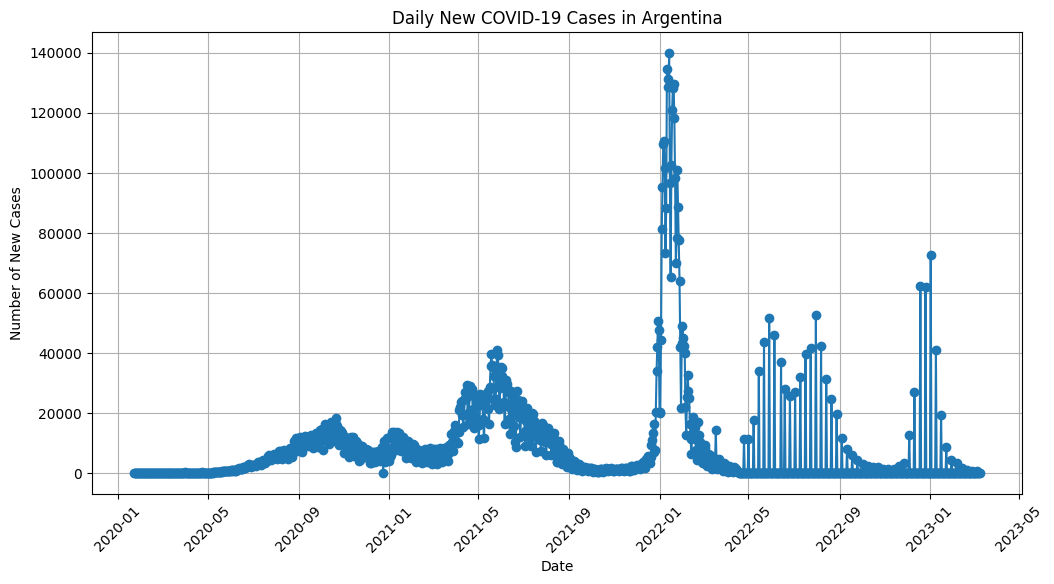

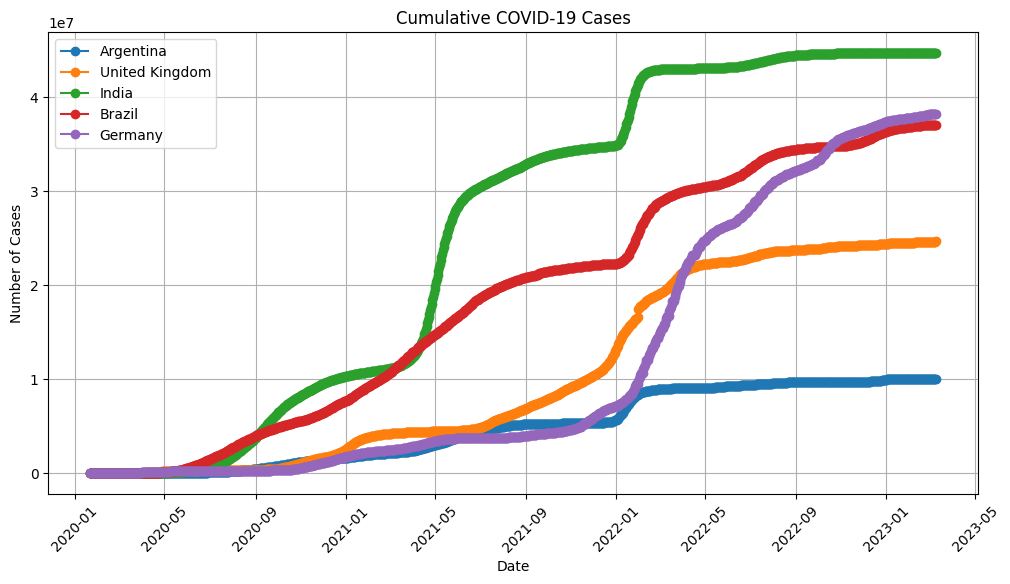

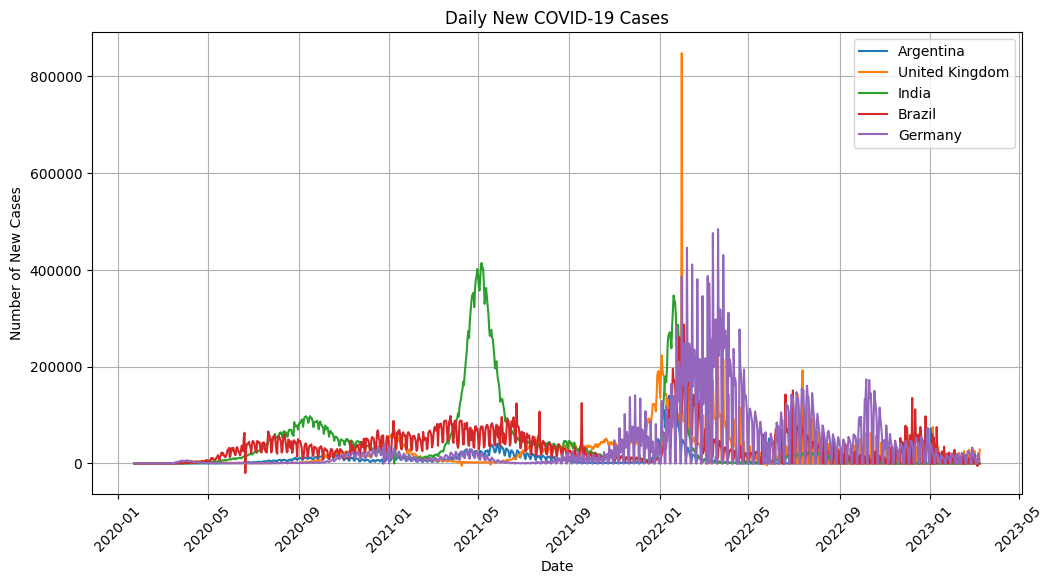

In [30]:
# Step 3: Data Analysis and Visualization
def plot_daily_new_cases(df, country):
    """
    Plots the daily new COVID-19 cases for a specific country.
    """
    # Calculate daily new cases for the selected country
    df_country = pd.DataFrame({'Date': df.index, 'New Cases': df[country].diff()}).set_index('Date')

    # Plot the daily new cases for the selected country
    plt.figure(figsize=(12, 6))
    plt.plot(df_country.index, df_country['New Cases'], marker='o')
    plt.title(f'Daily New COVID-19 Cases in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of New Cases')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Return the DataFrame with daily new cases
    return df_country

# Choose a specific country for analysis
country = 'Argentina'

# Plot the daily new cases for the selected country
df_country = plot_daily_new_cases(df, country)

# Additional Visualizations and Analysis
def plot_cumulative_cases(df, countries):
    """
    Plots the cumulative COVID-19 cases for multiple countries.
    """
    plt.figure(figsize=(12, 6))

    for country in countries:
        # Plot the cumulative COVID-19 cases for each country
        plt.plot(df.index, df[country], marker='o', label=country)

    plt.title('Cumulative COVID-19 Cases')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the cumulative cases for the selected countries
countries = ['Argentina', 'United Kingdom', 'India', 'Brazil', 'Germany']
plot_cumulative_cases(df, countries)

# Perform additional analysis or visualizations here
# Example: Plotting the daily new cases for multiple countries
plt.figure(figsize=(12, 6))

for country in countries:
    # Calculate daily new cases for each country
    df_country = pd.DataFrame({'Date': df.index, 'New Cases': df[country].diff()}).set_index('Date')

    # Plot the daily new cases
    plt.plot(df_country.index, df_country['New Cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

The cumulative COVID-19 cases demonstrate the overall progression of the virus in Argentina and other countries, showing the impact and spread over time.<br>
By comparing different countries, we can analyze the varying trends, outbreak severity, and the effectiveness of containment measures.<br>
Further analysis can include calculating growth rates, mortality rates, or exploring the relationship between cases and vaccination rates.<br>
Interactive visualizations can provide more detailed insights and allow users to interact with the data.